<a href="https://colab.research.google.com/github/sivasamy1/Machine_learning_research/blob/main/Stock_price_prediction_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [260]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [261]:
df = pd.read_csv("Bitcoin_8_30_2024-8_30_2025_historical_data_coinmarketcap.csv", delimiter=';')
df["timeOpen"] = pd.to_datetime(df["timeOpen"], utc=True)
df["timeClose"] = pd.to_datetime(df["timeClose"], utc=True)
df["timeHigh"] = pd.to_datetime(df["timeHigh"], utc=True)
df["timeLow"] = pd.to_datetime(df["timeLow"], utc=True)
df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
df = df.sort_values(by="timeOpen", ascending=True).reset_index(drop=True)
# df = df[df.name == "2781"]

In [262]:
print(tabulate(df, headers='keys', tablefmt='github'))

|     | timeOpen                  | timeClose                        | timeHigh                  | timeLow                   |   name |     open |     high |      low |    close |      volume |   marketCap | timestamp                        |
|-----|---------------------------|----------------------------------|---------------------------|---------------------------|--------|----------|----------|----------|----------|-------------|-------------|----------------------------------|
|   0 | 2024-08-31 00:00:00+00:00 | 2024-08-31 23:59:59.999000+00:00 | 2024-08-31 00:34:00+00:00 | 2024-08-31 17:52:00+00:00 |   2781 |  59117.5 |  59432.6 |  58768.8 |  58969.9 | 1.24035e+10 | 1.16452e+12 | 2024-08-31 23:59:59.999000+00:00 |
|   1 | 2024-09-01 00:00:00+00:00 | 2024-09-01 23:59:59.999000+00:00 | 2024-09-01 00:17:00+00:00 | 2024-09-01 23:19:00+00:00 |   2781 |  58969.8 |  59062.1 |  57217.8 |  57325.5 | 2.45924e+10 | 1.13211e+12 | 2024-09-01 23:59:59.999000+00:00 |
|   2 | 2024-09-02 00:00:00+

In [263]:
forecast_col = 'open'
forecast_out = 3
test_size = 0.47999999999999976

In [264]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method where the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

In [265]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.9593367005964499, 'forecast_set': array([111139.7388738 , 110587.4357579 , 111862.67270852])}


In [266]:
forecast_col1 = 'close'
forecast_out1 = 3
test_size1 = 0.29

In [267]:
X_train1, X_test1, Y_train1, Y_test1 , X_lately1 =prepare_data(df,forecast_col1,forecast_out1,test_size1); #calling the method where the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train1,Y_train1) #training the linear regression model

LinearRegression()

In [268]:
score1=learner.score(X_test1,Y_test1)#testing the linear regression model
forecast1= learner.predict(X_lately1) #set that will contain the forecasted data
response['test_score1']=score1
response['forecast_set1']=forecast1

print(response)

{'test_score': 0.9593367005964499, 'forecast_set': array([111139.7388738 , 110587.4357579 , 111862.67270852]), 'test_score1': 0.9695434431296331, 'forecast_set1': array([110979.68268037, 112260.42683639, 108257.71658615])}


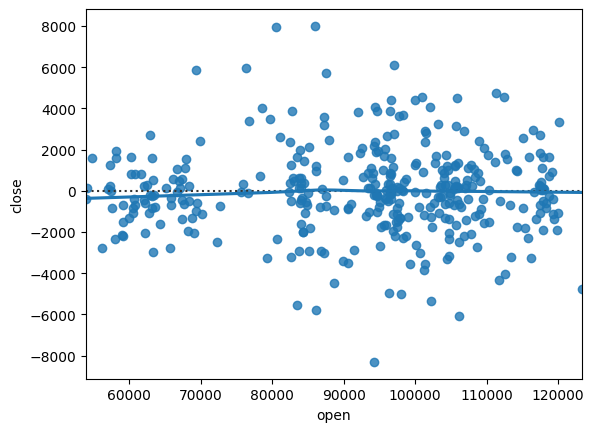

In [269]:
sns.residplot(x='open', y='close', data=df, lowess = True)
plt.xlabel("open")
plt.ylabel("close")
plt.show()

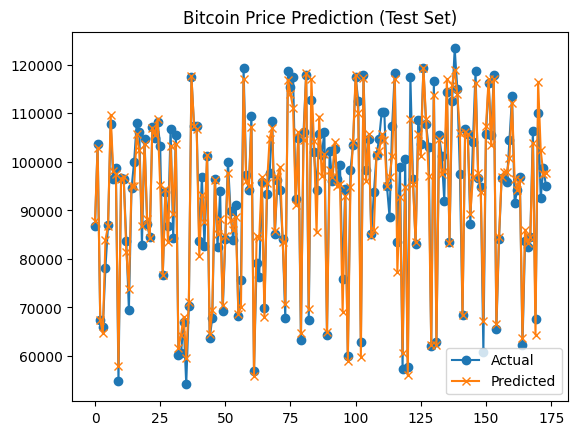

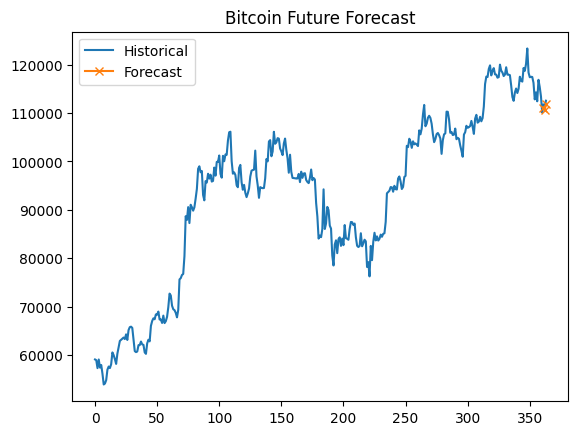

In [270]:
import matplotlib.pyplot as plt

# Plot actual vs predicted for test set
plt.plot(Y_test, label="Actual", marker='o')
plt.plot(learner.predict(X_test), label="Predicted", marker='x')
plt.legend()
plt.title("Bitcoin Price Prediction (Test Set)")
plt.show()

# Plot forecast for future dates
future_index = df.index[-forecast_out:]
plt.plot(df[forecast_col].values, label="Historical")
plt.plot(future_index, forecast, label="Forecast", marker='x')
plt.legend()
plt.title("Bitcoin Future Forecast")
plt.show()


In [271]:
r2 = r2_score(Y_test, forecast)
rmse = mean_squared_error(Y_test, forecast, squared=False)


ValueError: Found input variables with inconsistent numbers of samples: [174, 3]

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

X = np.array(df[["open"]])
y = np.array(df["close"])

results = []

for ts in np.arange(0.1, 0.9, 0.01):  # try test sizes from 0.1 to 0.45
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=ts, shuffle=False   # shuffle=False for time-series
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)


    results.append((ts, r2, rmse))

# Convert to DataFrame for easy view
results_df = pd.DataFrame(results, columns=["test_size", "R2_score", "RMSE"])
print(tabulate(results_df, headers='keys', tablefmt='github'))

In [ ]:
plt.plot(results_df["test_size"], results_df["R2_score"], marker='o')
plt.legend()
plt.show()

In [272]:
max_idx = results_df["R2_score"].idxmax()
results_df.loc[max_idx, "test_size"]

np.float64(0.47999999999999976)

In [273]:
 results_df.loc[max_idx, "R2_score"]

np.float64(0.9753452740851446)